In [12]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import geom
import matplotlib.pyplot as plt


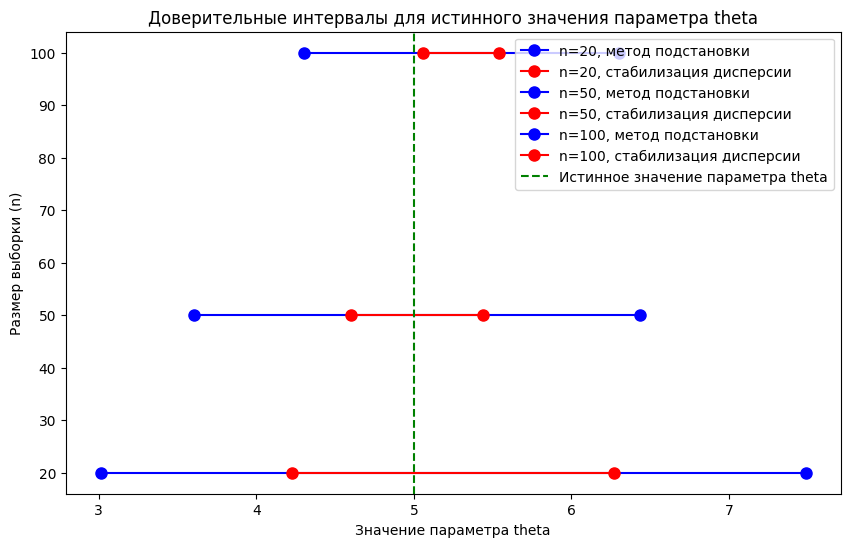

n=20:
Эмпирическая вероятность доверительного интервала методом подстановки: 1.0
Эмпирическая вероятность доверительного интервала методом стабилизации дисперсии: 0.947

n=50:
Эмпирическая вероятность доверительного интервала методом подстановки: 1.0
Эмпирическая вероятность доверительного интервала методом стабилизации дисперсии: 0.818

n=100:
Эмпирическая вероятность доверительного интервала методом подстановки: 1.0
Эмпирическая вероятность доверительного интервала методом стабилизации дисперсии: 0.673



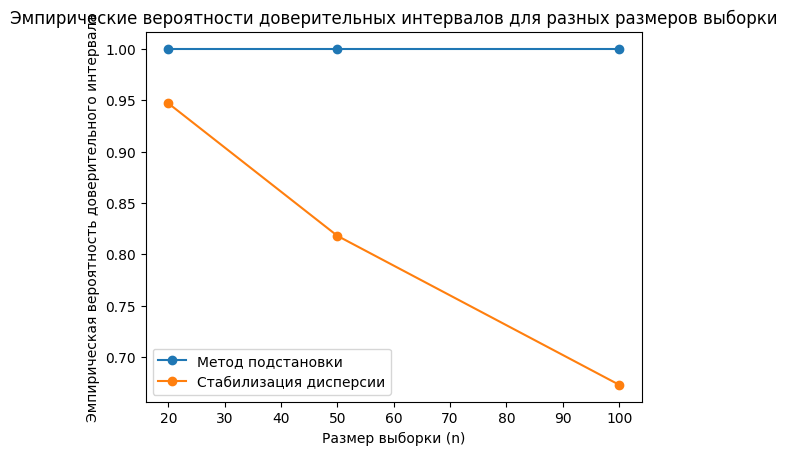

In [8]:
#2.1
def substitution_method_CI(sample, alpha=0.05):
    n = len(sample)
    sample_mean = np.mean(sample)
    z_alpha = poisson.ppf(1 - alpha/2, sample_mean)
    lower_bound = sample_mean - z_alpha / np.sqrt(n)
    upper_bound = sample_mean + z_alpha / np.sqrt(n)
    return lower_bound, upper_bound

def variance_stabilization_CI(sample, alpha=0.05):
    n = len(sample)
    sample_mean = np.mean(sample)
    sample_var = np.var(sample)
    z_alpha = poisson.ppf(1 - alpha/2, sample_mean)
    lower_bound = sample_mean - z_alpha * np.sqrt(sample_var) / n
    upper_bound = sample_mean + z_alpha * np.sqrt(sample_var) / n
    return lower_bound, upper_bound

def empirical_CI_probabilities(true_theta, method_CI, n, num_samples=1000):
    covered_count = 0
    for _ in range(num_samples):
        sample = poisson.rvs(true_theta, size=n)
        lower_bound, upper_bound = method_CI(sample)
        if lower_bound <= true_theta <= upper_bound:
            covered_count += 1
    return covered_count / num_samples

def simulate_interval_lengths(true_theta, method_CI, n, num_samples=1000):
    interval_lengths_list = []
    for _ in range(num_samples):
        sample = poisson.rvs(true_theta, size=n)
        lower_bound, upper_bound = method_CI(sample)
        interval_length = upper_bound - lower_bound
        interval_lengths_list.append(interval_length)
    return interval_lengths_list

true_theta = 5
n_values = [20, 50, 100]
alpha = 0.05

plt.figure(figsize=(10, 6))

for n in n_values:
    sample = poisson.rvs(true_theta, size=n)

    substitution_lower_bound, substitution_upper_bound = substitution_method_CI(sample)
    plt.plot([substitution_lower_bound, substitution_upper_bound], [n, n], color='blue', marker='o', markersize=8, label=f'n={n}, метод подстановки')

    variance_stabilization_lower_bound, variance_stabilization_upper_bound = variance_stabilization_CI(sample)
    plt.plot([variance_stabilization_lower_bound, variance_stabilization_upper_bound], [n, n], color='red', marker='o', markersize=8, label=f'n={n}, стабилизация дисперсии')

plt.axvline(x=true_theta, color='green', linestyle='--', label='Истинное значение параметра theta')
plt.xlabel('Значение параметра theta')
plt.ylabel('Размер выборки (n)')
plt.title('Доверительные интервалы для истинного значения параметра theta')
plt.legend()
plt.show()

substitution_CI_probs = []
variance_stabilization_CI_probs = []

for n in n_values:
    substitution_CI_prob = empirical_CI_probabilities(true_theta, substitution_method_CI, n)
    variance_stabilization_CI_prob = empirical_CI_probabilities(true_theta, variance_stabilization_CI, n)

    substitution_CI_probs.append(substitution_CI_prob)
    variance_stabilization_CI_probs.append(variance_stabilization_CI_prob)

    print(f"n={n}:")
    print(f"Эмпирическая вероятность доверительного интервала методом подстановки: {substitution_CI_prob}")
    print(f"Эмпирическая вероятность доверительного интервала методом стабилизации дисперсии: {variance_stabilization_CI_prob}")
    print()

plt.plot(n_values, substitution_CI_probs, marker='o', label='Метод подстановки')
plt.plot(n_values, variance_stabilization_CI_probs, marker='o', label='Стабилизация дисперсии')
plt.xlabel('Размер выборки (n)')
plt.ylabel('Эмпирическая вероятность доверительного интервала')
plt.title('Эмпирические вероятности доверительных интервалов для разных размеров выборки')
plt.legend()
plt.show()

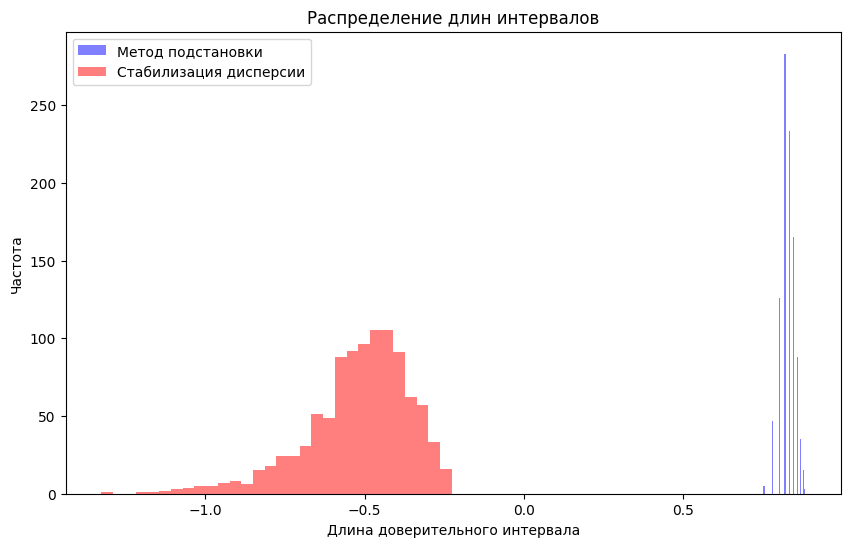

Средняя длина доверительных интервалов:
Метод подстановки: 0.8279670249684957
Стабилизация дисперсии: -0.5201868389102701


In [31]:
#2.2
substitution_interval_lengths = simulate_interval_lengths(true_theta, substitution_method_CI, 50)
variance_stabilization_interval_lengths = simulate_interval_lengths(true_theta, variance_stabilization_CI, 50)

plt.figure(figsize=(10, 6))
plt.hist(substitution_interval_lengths, bins=30, alpha=0.5, color='blue', label='Метод подстановки')
plt.hist(variance_stabilization_interval_lengths, bins=30, alpha=0.5, color='red', label='Стабилизация дисперсии')
plt.xlabel('Длина доверительного интервала')
plt.ylabel('Частота')
plt.title('Распределение длин интервалов')
plt.legend()
plt.show()

mean_substitution_length = np.mean(substitution_interval_lengths)
mean_variance_stabilization_length = np.mean(variance_stabilization_interval_lengths)

print("Средняя длина доверительных интервалов:")
print("Метод подстановки:", mean_substitution_length)
print("Стабилизация дисперсии:", mean_variance_stabilization_length)

In [11]:
#2.3 Сделать нельзя так как нет файлов

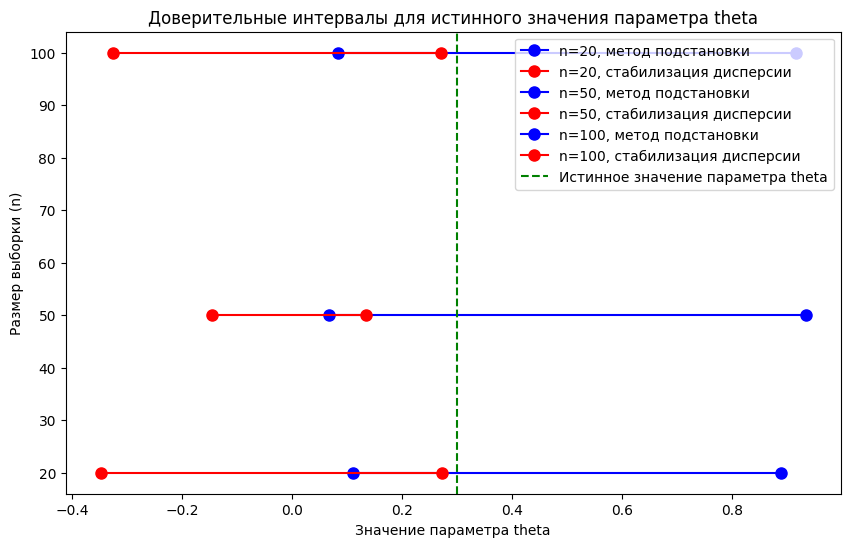

n=20:
Эмпирическая вероятность доверительного интервала методом подстановки: 1.0
Эмпирическая вероятность доверительного интервала методом стабилизации дисперсии: 0.0

n=50:
Эмпирическая вероятность доверительного интервала методом подстановки: 1.0
Эмпирическая вероятность доверительного интервала методом стабилизации дисперсии: 0.0

n=100:
Эмпирическая вероятность доверительного интервала методом подстановки: 1.0
Эмпирическая вероятность доверительного интервала методом стабилизации дисперсии: 0.0



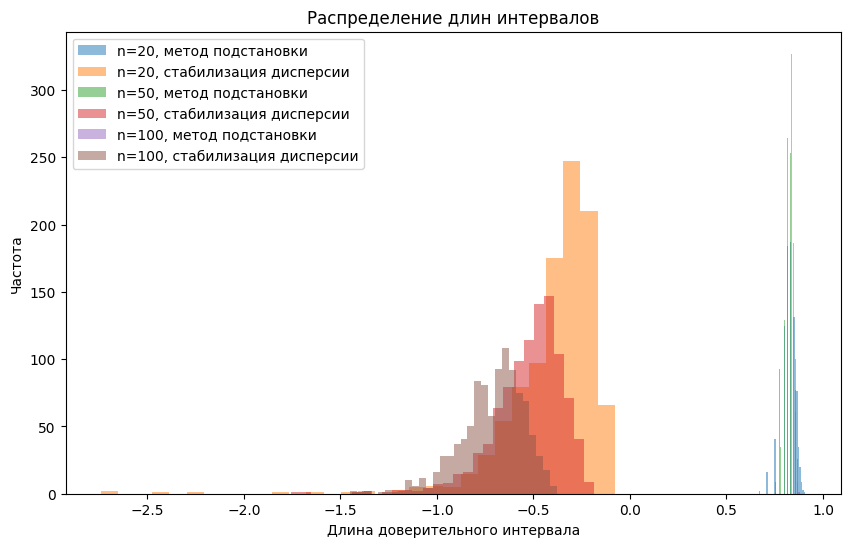

In [32]:
#3.1
def substitution_method_CI(sample, alpha=0.05):
    n = len(sample)
    sample_mean = np.mean(sample)
    z_alpha = geom.ppf(1 - alpha/2, 1/sample_mean)
    lower_bound = 1 / (z_alpha + 1)
    upper_bound = 1 / (1/z_alpha + 1)
    return lower_bound, upper_bound

def variance_stabilization_CI(sample, alpha=0.05):
    n = len(sample)
    sample_mean = np.mean(sample)
    sample_var = np.var(sample)
    z_alpha = geom.ppf(1 - alpha/2, 1/sample_mean)
    lower_bound = 1 / (1/sample_mean + z_alpha * np.sqrt(sample_var) / np.sqrt(n))
    upper_bound = 1 / (1/sample_mean - z_alpha * np.sqrt(sample_var) / np.sqrt(n))
    return lower_bound, upper_bound

def empirical_CI_probabilities(true_theta, method_CI, n, num_samples=1000):
    covered_count = 0
    for _ in range(num_samples):
        sample = geom.rvs(true_theta, size=n)
        lower_bound, upper_bound = method_CI(sample)
        if lower_bound <= true_theta <= upper_bound:
            covered_count += 1
    return covered_count / num_samples

def simulate_interval_lengths(true_theta, method_CI, n, num_samples=1000):
    interval_lengths_list = []
    for _ in range(num_samples):
        sample = geom.rvs(true_theta, size=n)
        lower_bound, upper_bound = method_CI(sample)
        interval_length = upper_bound - lower_bound
        interval_lengths_list.append(interval_length)
    return interval_lengths_list

true_theta = 0.3
n_values = [20, 50, 100]
alpha = 0.05

plt.figure(figsize=(10, 6))

for n in n_values:
    sample = geom.rvs(true_theta, size=n)

    substitution_lower_bound, substitution_upper_bound = substitution_method_CI(sample)
    plt.plot([substitution_lower_bound, substitution_upper_bound], [n, n], color='blue', marker='o', markersize=8, label=f'n={n}, метод подстановки')

    variance_stabilization_lower_bound, variance_stabilization_upper_bound = variance_stabilization_CI(sample)
    plt.plot([variance_stabilization_lower_bound, variance_stabilization_upper_bound], [n, n], color='red', marker='o', markersize=8, label=f'n={n}, стабилизация дисперсии')

plt.axvline(x=true_theta, color='green', linestyle='--', label='Истинное значение параметра theta')
plt.xlabel('Значение параметра theta')
plt.ylabel('Размер выборки (n)')
plt.title('Доверительные интервалы для истинного значения параметра theta')
plt.legend()
plt.show()

substitution_CI_probs = []
variance_stabilization_CI_probs = []

for n in n_values:
    substitution_CI_prob = empirical_CI_probabilities(true_theta, substitution_method_CI, n)
    variance_stabilization_CI_prob = empirical_CI_probabilities(true_theta, variance_stabilization_CI, n)

    substitution_CI_probs.append(substitution_CI_prob)
    variance_stabilization_CI_probs.append(variance_stabilization_CI_prob)

    print(f"n={n}:")
    print(f"Эмпирическая вероятность доверительного интервала методом подстановки: {substitution_CI_prob}")
    print(f"Эмпирическая вероятность доверительного интервала методом стабилизации дисперсии: {variance_stabilization_CI_prob}")
    print()

plt.figure(figsize=(10, 6))
for n in n_values:
    substitution_interval_lengths = simulate_interval_lengths(true_theta, substitution_method_CI, n)
    variance_stabilization_interval_lengths = simulate_interval_lengths(true_theta, variance_stabilization_CI, n)
    plt.hist(substitution_interval_lengths, bins=30, alpha=0.5, label=f'n={n}, метод подстановки')
    plt.hist(variance_stabilization_interval_lengths, bins=30, alpha=0.5, label=f'n={n}, стабилизация дисперсии')
plt.xlabel('Длина доверительного интервала')
plt.ylabel('Частота')
plt.title('Распределение длин интервалов')
plt.legend()
plt.show()

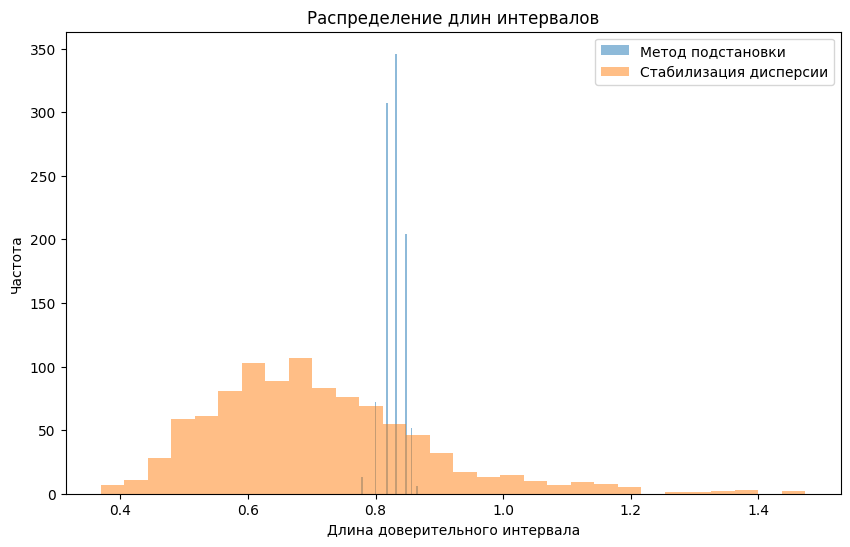

Средняя длина доверительных интервалов:
Метод подстановки: 0.829613075813076
Стабилизация дисперсии: 0.7079443808417828


In [34]:
substitution_interval_lengths = []
variance_stabilization_interval_lengths = []

for _ in range(1000):
    sample = geom.rvs(true_theta, size=100)

    substitution_lower_bound, substitution_upper_bound = substitution_method_CI(sample)
    substitution_interval_length = substitution_upper_bound - substitution_lower_bound
    substitution_interval_lengths.append(substitution_interval_length)

    variance_stabilization_lower_bound, variance_stabilization_upper_bound = variance_stabilization_CI(sample)
    variance_stabilization_interval_length = abs(variance_stabilization_upper_bound - variance_stabilization_lower_bound)
    variance_stabilization_interval_lengths.append(variance_stabilization_interval_length)

plt.figure(figsize=(10, 6))
plt.hist(substitution_interval_lengths, bins=30, alpha=0.5, label='Метод подстановки')
plt.hist(variance_stabilization_interval_lengths, bins=30, alpha=0.5, label='Стабилизация дисперсии')
plt.xlabel('Длина доверительного интервала')
plt.ylabel('Частота')
plt.title('Распределение длин интервалов')
plt.legend()
plt.show()

mean_substitution_length = np.mean(substitution_interval_lengths)
mean_variance_stabilization_length = np.mean(variance_stabilization_interval_lengths)

print("Средняя длина доверительных интервалов:")
print("Метод подстановки:", mean_substitution_length)
print("Стабилизация дисперсии:", mean_variance_stabilization_length)

In [ ]:
#3.3 не сделал так как нет файла